<a href="https://colab.research.google.com/github/sathvik8317/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Python Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

Importing the models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import LocalOutlierFactor

Time - > The number of seconds elapsed between first transaction and current transaction.

V1-V28 - > These are the principal components obtained with PCA , due to confidentiality issues original features are not provided in the given dataset

Amount - > Transaction Amount

Class - > For determining whether a transaction is Fraudulent or Legit

1 - > Fraudulent Transaction

0 - > Legit Transaction



Loading the dataset into the Pandas dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/credit_data.csv')
#df = pd.read_csv('credit_data.csv')

Printing the First 5 rows of the dataframe

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape # This gives us the number of rows and number of columns in the dataframe

(284807, 31)

Printing the Last 5 rows of the dataframe

In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Knowing the information of the dataset

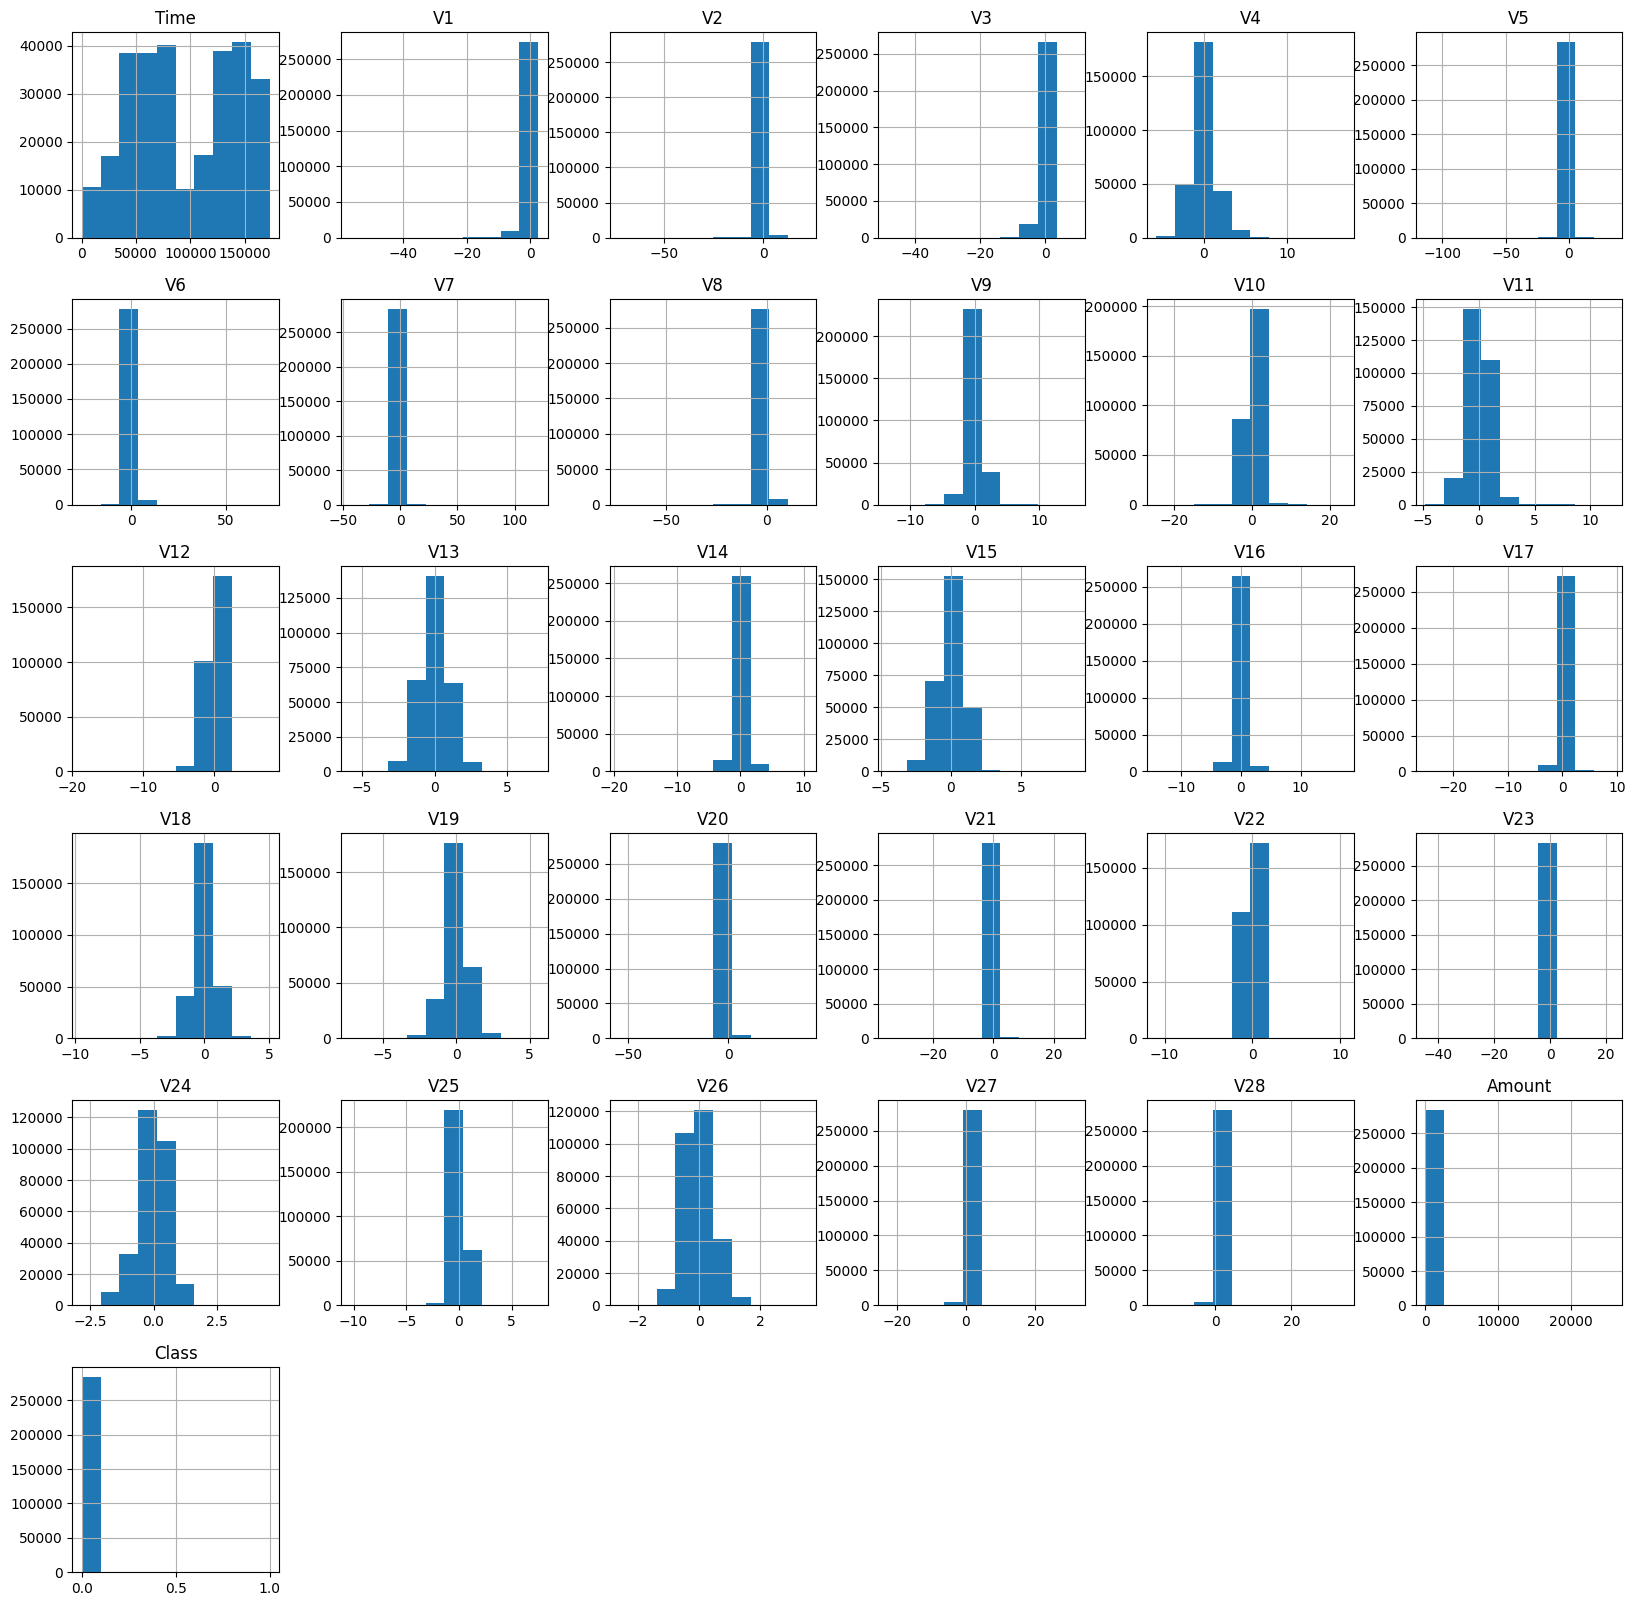

In [ ]:
# plot the histogram of each parameter
df.hist(figsize = (20, 20))
plt.show()

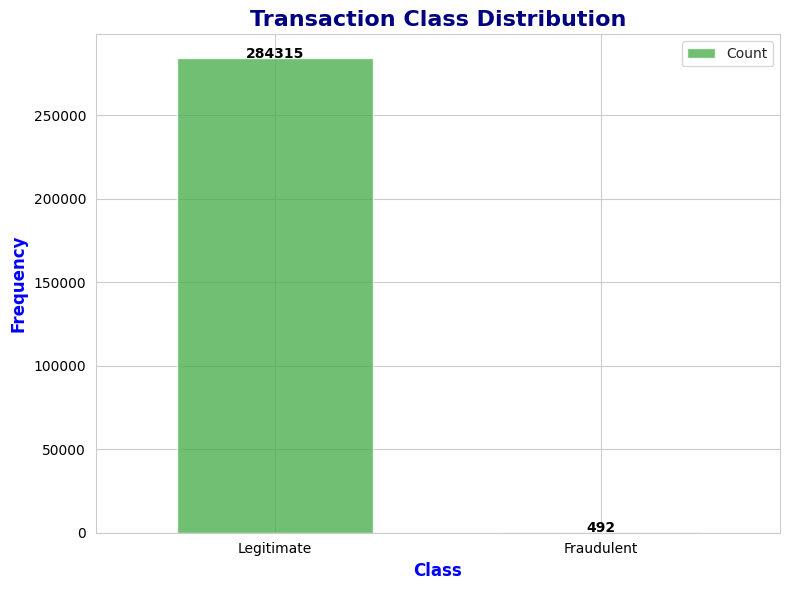

In [ ]:
count_classes = df['Class'].value_counts()

# Customizing plot style and colors
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")  # Set plot style to white grid
colors = ['#4CAF50', '#FF5733']  # Custom colors for bars

# Plotting the bar chart
count_classes.plot(kind='bar', color=colors, width=0.6, alpha=0.8)

# Adding title and labels with custom font and style
plt.title("Transaction Class Distribution", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("Class", fontsize=12, fontweight='bold', color='blue')
plt.ylabel("Frequency", fontsize=12, fontweight='bold', color='blue')

# Customizing tick labels and legend
LABELS = ["Legitimate", "Fraudulent"]
plt.xticks(range(2), LABELS, rotation=0, fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.legend(['Count'], loc='upper right', fontsize=10)

# Adding annotations to the bars
for i, value in enumerate(count_classes):
    plt.text(i, value + 2, str(value), ha='center', fontsize=10, fontweight='bold', color='black')

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

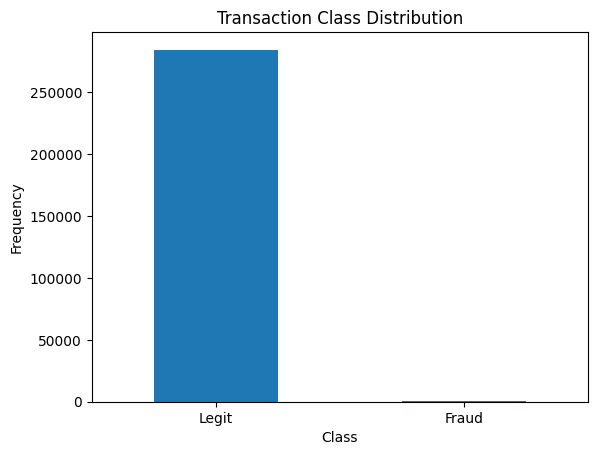

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
LABELS = ["Legit", "Fraud"]
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Finding whether there are any missing values present in the dataset

In [ ]:
df.isnull().sum()  # as we can see there are no missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Calculating how many legit and fradulent transactions have taken place

In [ ]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

By this we can say that this is highly unbalanced dataset

Now We are seperating the Legit Transactions and Fradulent Transactions

In [ ]:
legit = df[df.Class==0]
fraud = df[df.Class==1]

In [ ]:
legit.shape

(284315, 31)

In [ ]:
fraud.shape

(492, 31)

Finding the Statistical Measures of the Legit and Fraud Transactions

In [ ]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

As we can Observe that the Mean of Fradulent is more than Legit

In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


There is a large difference between values of normal transaction and fraud transaction

As we know that this is highly unbalanced dataset , we use under-sampling technique to balance the dataset

In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
print(legit_sample.shape)
print(fraud.shape)

(492, 31)
(492, 31)


In [ ]:
# Now both the legit and fraud transactions are Balanced,so we merge the both into a single dataframe
new_df = pd.concat([legit_sample,fraud],axis =0)

In [ ]:
new_df.shape

(984, 31)

In [ ]:
correlation = new_df.corr()

In [ ]:
correlation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.227037,-0.168368,0.110816,-0.161520,0.247254,0.076589,0.189716,-0.136278,0.115670,...,-0.046277,0.126162,0.060420,-0.076932,-0.207550,-0.035846,-0.127661,0.038693,0.004365,-0.088494
V1,0.227037,1.000000,-0.753740,0.873195,-0.615122,0.836918,0.330121,0.882847,-0.079028,0.639445,...,-0.000057,-0.035206,-0.084829,-0.078875,-0.088836,0.045742,0.186153,0.177444,-0.054151,-0.431410
V2,-0.168368,-0.753740,1.000000,-0.838064,0.647887,-0.795688,-0.219135,-0.815797,-0.021757,-0.671205,...,0.046322,-0.017652,0.061815,0.012772,0.065448,0.018613,-0.150011,0.004374,-0.295982,0.482404
V3,0.110816,0.873195,-0.838064,1.000000,-0.765047,0.846570,0.460737,0.888367,-0.167332,0.759999,...,0.023574,-0.070674,-0.030177,0.016403,-0.076739,-0.028893,0.105491,0.127697,0.001590,-0.566765
V4,-0.161520,-0.615122,0.647887,-0.765047,1.000000,-0.556182,-0.425153,-0.711095,0.093057,-0.787003,...,-0.014558,0.118287,0.035080,-0.031762,-0.042612,0.163809,-0.018296,-0.081105,-0.001899,0.700381
V5,0.247254,0.836918,-0.795688,0.846570,-0.556182,1.000000,0.262974,0.834991,-0.205583,0.647166,...,0.039942,-0.097967,-0.057767,-0.154799,-0.079027,0.049373,0.191999,0.184890,-0.057136,-0.363045
V6,0.076589,0.330121,-0.219135,0.460737,-0.425153,0.262974,1.000000,0.276507,-0.569595,0.353368,...,0.044123,-0.017697,0.270946,-0.035576,-0.135071,-0.035270,-0.166452,-0.027471,0.091774,-0.381600
V7,0.189716,0.882847,-0.815797,0.888367,-0.711095,0.834991,0.276507,1.000000,0.090038,0.754856,...,0.033085,-0.116683,-0.084154,-0.068738,0.056113,0.013978,0.232762,0.159122,0.113866,-0.470906
V8,-0.136278,-0.079028,-0.021757,-0.167332,0.093057,-0.205583,-0.569595,0.090038,1.000000,-0.078395,...,-0.137791,0.052655,-0.408285,0.079360,0.234056,0.043513,0.292045,-0.026243,0.027934,0.050879
V9,0.115670,0.639445,-0.671205,0.759999,-0.787003,0.647166,0.353368,0.754856,-0.078395,1.000000,...,0.154809,-0.242954,-0.037247,-0.001268,0.021095,-0.134351,0.138262,0.157350,0.029937,-0.560017


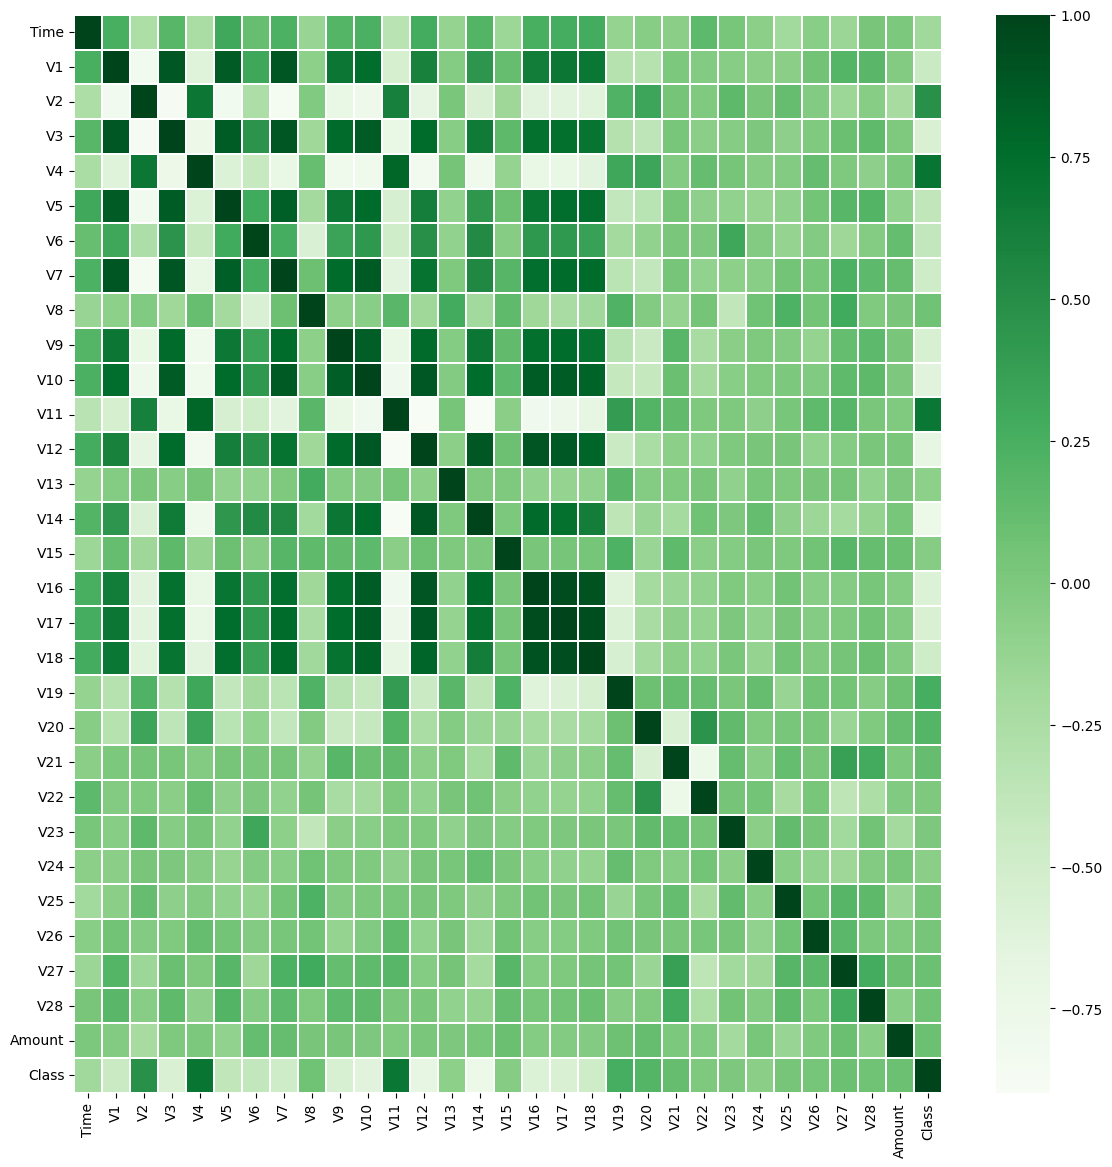

In [ ]:
plt.figure(figsize = (14,14))
# plt.title('Credit Card Transactions features correlation plot')
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,linewidths=.1,cmap="Greens")
plt.show()

In [ ]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199513,132999.0,0.180439,0.813624,0.091410,2.789279,1.619601,0.845637,1.370815,-0.242900,-1.245892,...,0.204387,0.763569,0.140296,0.053138,-0.737482,-0.146839,-0.024137,-0.050692,94.32,0
213705,139362.0,1.999129,-0.871879,-1.474626,-0.284227,-0.583095,-1.251546,0.055844,-0.437967,-0.592548,...,-0.472005,-0.985040,0.210419,-0.035951,-0.253724,0.472479,-0.089102,-0.048048,106.94,0
217152,140788.0,-1.957313,0.553739,-1.469971,1.433335,2.002534,-1.282101,0.438547,0.157596,-0.485644,...,-0.060822,0.183569,-0.982086,0.572284,-0.041215,-0.409240,0.684402,-0.188214,20.61,0
117578,74727.0,-0.809910,0.995062,1.114175,0.073135,-0.333193,-0.071817,0.059337,0.638455,-0.166593,...,0.045206,0.281213,-0.177757,0.035373,-0.117196,0.370561,0.225439,0.123836,7.27,0
158767,111734.0,2.001399,0.102973,-1.755182,1.205528,0.579657,-0.696917,0.521446,-0.242551,0.058754,...,0.069670,0.337291,-0.071353,-0.416667,0.471192,-0.487008,-0.028011,-0.075040,19.09,0


In [ ]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,89151.343496,0.035163,-0.076406,0.027410,0.084583,-0.094089,-0.072257,-0.075756,0.073859,0.057842,...,-0.016426,0.023518,-0.025974,0.041474,-0.043179,0.026205,-0.022684,0.006422,0.012154,91.237805
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
# Even though we have done under-sampling the values of legit transactions greatly vary from fraud transactions

Splitting the data into features and targets

In [ ]:
X = new_df.drop(columns = 'Class',axis=1)
Y = new_df['Class']

In [ ]:
print(X.shape)
print(Y.shape)

(984, 30)
(984,)


Splitting the data into training data and testing data

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

The stratify is used to evenly distribute the class values in Y.

If we dont use stratify there might be a chance that most of 1's goes into training data and most of 0's go into testing data or converse

By using stratify it evenly distributes 1's and 0's in training and testing data


Applying the Logistic Regression model

**Accuracy Score**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
model = LogisticRegression()
model.fit(X_train,Y_train)
print(model.score(X_test,Y_test))
# That means this model can predict 94% of the transactions which are legit and which are fraud

0.9289340101522843


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,Y_train)
print(model.score(X_test,Y_test))

0.6395939086294417


In [ ]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)
print(model.score(X_test,Y_test))

0.9238578680203046


In [ ]:
# Accuracy of training data
X_train_pred = model.predict(X_train)
train_acc = accuracy_score(X_train_pred,Y_train)
print(train_acc)

0.9428208386277002


In [ ]:
# Accuracy of testing data
X_test_pred = model.predict(X_test)
test_acc = accuracy_score(X_test_pred,Y_test)
print(test_acc)

0.9086294416243654


In [ ]:
# X = df.drop(columns='Class',axis=1)
# Y = df['Class']

In [ ]:
# print(X.shape)
# print(Y.shape)

In [ ]:
# X_train , X_test ,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,stratify=Y,random_state=20)
# model = LogisticRegression()
# model.fit(X_train,Y_train)
# model.score(X_test,Y_test)

We are getting around 99% accuracy but this may not be the best approach.

While it is true that undersampling can reduce the size of the dataset and make the training process more computationally expensive, it can also help to improve the performance of the model by making it more sensitive to fraudulent transactions.

this is because undersampling reduce no of legit transaction which can help to prevent model from becoming overly confident in its predictions.





**Precision score**

In [ ]:
# precision for training data predictions
precision_train = precision_score(Y_train, X_train_pred)
print('Training data Precision =', precision_train)

Training data Precision = 0.9604221635883905


In [ ]:
# precision for test data predictions
precision_test = precision_score(Y_test, X_test_pred)
print('Test data Precision =', precision_test)

Test data Precision = 0.9347826086956522


**Recall Score**

In [ ]:
# recall for training data predictions
recall_train = recall_score(Y_train, X_train_pred)
print('Training data Recall =', recall_train)

Training data Recall = 0.9238578680203046


In [ ]:
# recall for test data predictions
recall_test = recall_score(Y_test, X_test_pred)
print('Test data Recall =', recall_test)

Test data Recall = 0.8775510204081632


F1 Score

In [ ]:
# F1 score for training data predictions
f1_score_train = f1_score(Y_train, X_train_pred)
print('Training data F1 Score =', f1_score_train)

Training data F1 Score = 0.9417852522639067


In [ ]:
# F1 Score for test data predictions
f1_score_test = recall_score(Y_test, X_test_pred)
print('Test data F1 Score =', f1_score_test)

Test data F1 Score = 0.8775510204081632


In [ ]:
models = [
    LogisticRegression(max_iter=1000),
    SVC(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]

# Iterate over each model and evaluate performance
for model in models:
    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions on test data
    Y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    # Print model name and evaluation metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-------------------------------------")

Model: LogisticRegression
Accuracy: 0.9289
Precision: 0.9565
Recall: 0.8980
F1-Score: 0.9263
-------------------------------------
Model: SVC
Accuracy: 0.4975
Precision: 0.4952
Recall: 0.5306
F1-Score: 0.5123
-------------------------------------
Model: RandomForestClassifier
Accuracy: 0.9239
Precision: 0.9882
Recall: 0.8571
F1-Score: 0.9180
-------------------------------------
Model: KNeighborsClassifier
Accuracy: 0.6396
Precision: 0.6421
Recall: 0.6224
F1-Score: 0.6321
-------------------------------------


**Model Evaluation**

Applying Other Machine Learning models

## Confusion matrix

In [ ]:
TP = confusion_matrix[0, 0]
TN = confusion_matrix[1, 1]
FP = confusion_matrix[1, 0]
FN = confusion_matrix[0, 1]

# TPR = TP / (TP + FN)
# TNR = TN / (TN + FP)
# FPR = FP / (FP + TN)
# FNR = FN / (TP + FN)

# print("\nTrue Positive Rate (TPR):", TPR)
# print("True Negative Rate (TNR):", TNR)
# print("False Positive Rate (FPR):", FPR)
# print("False Negative Rate (FNR):", FNR)
import pandas as pd


# Calculate rates
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (TP + FN)

# Create a DataFrame for rates
data = {
    'Metric': ['True Positive Rate (TPR)', 'True Negative Rate (TNR)',
               'False Positive Rate (FPR)', 'False Negative Rate (FNR)'],
    'Value': [TPR, TNR, FPR, FNR]
}

df_rates = pd.DataFrame(data)

# Display rates in tabular format
print("Rates:")
print(df_rates)


Rates:
                      Metric     Value
0   True Positive Rate (TPR)  0.898990
1   True Negative Rate (TNR)  0.857143
2  False Positive Rate (FPR)  0.142857
3  False Negative Rate (FNR)  0.101010


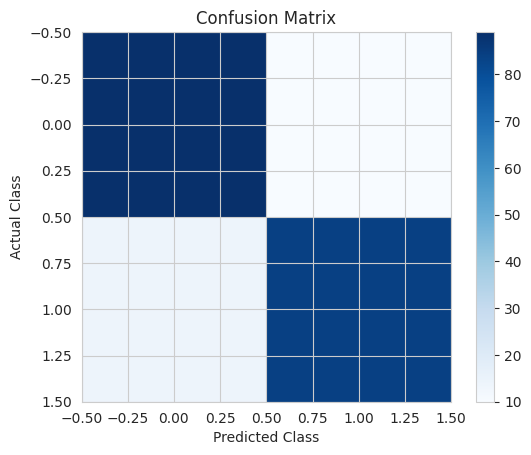

In [ ]:
# Create a heatmap of the confusion matrix
plt.imshow(confusion_matrix, cmap='Blues')

# Add labels and title
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')

# Show the heatmap
plt.show()

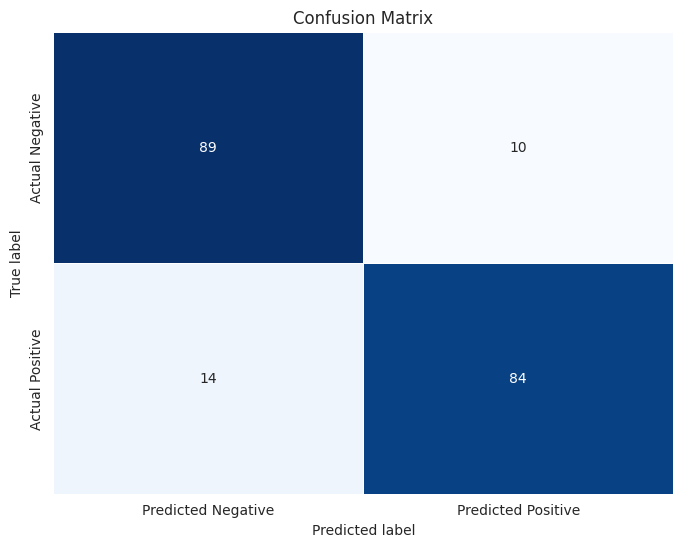

True Positive (TP): 89
True Negative (TN): 84
False Positive (FP): 14
False Negative (FN): 10


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Display TP, TN, FP, FN counts
print(f'True Positive (TP): {TP}')
print(f'True Negative (TN): {TN}')
print(f'False Positive (FP): {FP}')
print(f'False Negative (FN): {FN}')

Comparing models with default hyperparameters

**Cross Validation**

Cross Validation can be done using K fold or Stratified K fold

If you want to use K fold , the procedure is same but you need to write seperate code for training data and testing data.

Stratified K fold is same as stratified parameter that we use in train test split. When we use this the proportion of the classes will be similar in training and testing.

Stratified K fold is preffered than K fold

Creating a Function to compare the models

In [ ]:
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), RandomForestClassifier()]
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X_train,Y_train, cv=5)

    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')


In [ ]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000) =   [0.94936709 0.92405063 0.89171975 0.91719745 0.97452229]
Accuracy % of the  LogisticRegression(max_iter=1000) 93.14
----------------------------------------------
Cross Validation accuracies for  SVC() =   [0.56329114 0.51898734 0.55414013 0.46496815 0.57324841]
Accuracy % of the  SVC() 53.49
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =   [0.58860759 0.72151899 0.56687898 0.64968153 0.68152866]
Accuracy % of the  KNeighborsClassifier() 64.16
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.93670886 0.93037975 0.92356688 0.96178344 0.96178344]
Accuracy % of the  RandomForestClassifier() 94.28
----------------------------------------------


**Comparing models with different hyperparameters using GridSearchCV**

In [ ]:
models_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [ ]:
model_hyperparameters = {


    'log_reg_hyperparameters': {

        'C' : [1,5,10,20]
    },

    'svc_hyperparameters': {

        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },


    'KNN_hyperparameters' : {

        'n_neighbors' : [3,5,10]
    },


    'random_forest_hyperparameters' : {

        'n_estimators' : [10, 20, 50, 100]
    }
}

In [ ]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(X,Y)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [ ]:
model_keys = list(model_hyperparameters.keys())

In [ ]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
---------------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
---------------------------------


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.931881,{'C': 5}
1,SVC(),0.878913,"{'C': 20, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.398368,{'n_neighbors': 10}
3,RandomForestClassifier(random_state=0),0.937988,{'n_estimators': 20}


**Comparing models with different hyperparameters using RandomizedSearchCV**

In [ ]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = RandomizedSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(X,Y)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [ ]:
model_keys = list(model_hyperparameters.keys())

In [ ]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
---------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
---------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.931881,{'C': 5}
1,SVC(),0.878913,"{'kernel': 'linear', 'C': 20}"
2,KNeighborsClassifier(),0.398368,{'n_neighbors': 10}
3,RandomForestClassifier(random_state=0),0.937988,{'n_estimators': 20}


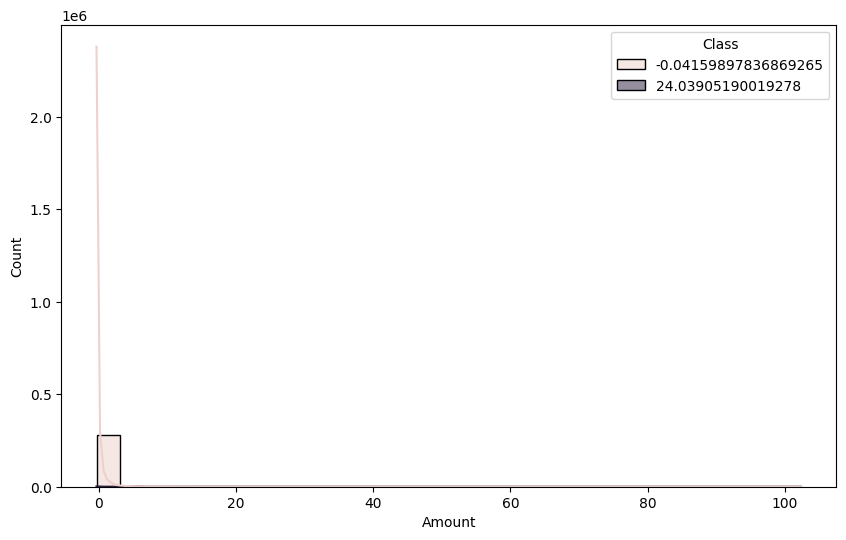

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transaction amounts by class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=30, kde=True)
# plt.title('Transaction Amount Distribution by Class')
# plt.xlabel('Transaction Amount')
# plt.ylabel('Frequency')
plt.show()

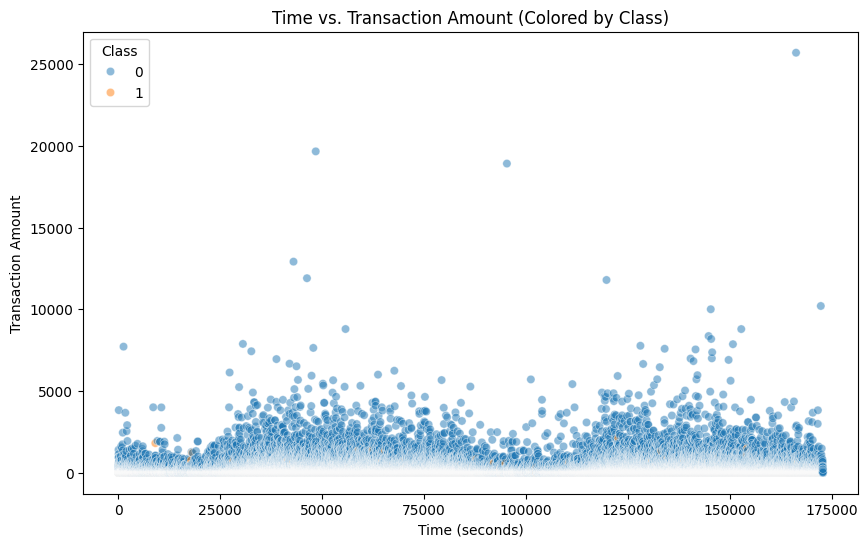

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', alpha=0.5)
plt.title('Time vs. Transaction Amount (Colored by Class)')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()


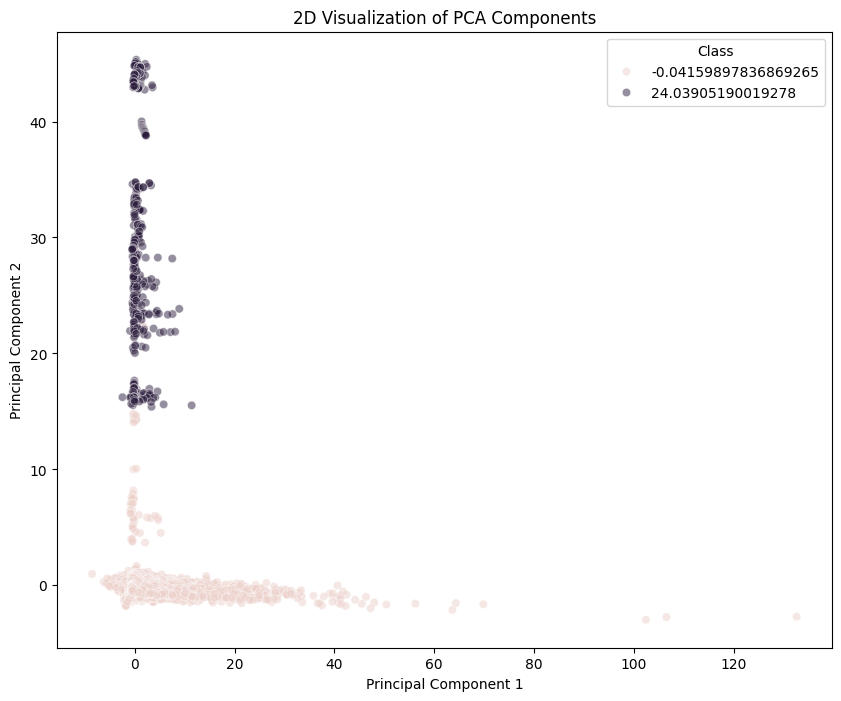

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Class'], alpha=0.5)
plt.title('2D Visualization of PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
